In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path1=os.getcwd()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
path=path1+'/Mod_Data.csv'
data=pd.read_csv(path)
#data.head()
print(np.count_nonzero(data['price'], axis=0))
print(data['price'].shape)

34217
(34226,)


In [3]:
X_enc_rt = pd.get_dummies(data.room_type, prefix='Roomtype')
X_enc_nh = pd.get_dummies(data.neighbourhood_group, prefix='NBG')
X_enc_ng = pd.get_dummies(data.neighbourhood, prefix='NB')

In [4]:
Var = pd.concat([data, X_enc_rt,X_enc_nh], axis=1)
#Var = data
#print('Var columns ',Var.shape)
#print('Data columns ',data.shape)


In [5]:
D1=Var[(Var['price'] > 0)]
#D2=D1.iloc[:,7:26]
n1=np.log(D1['price'])
D1['price new']=n1
D1.head()

<ipython-input-5-d270c63bba25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D1['price new']=n1


,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,Distance in m,Roomtype_Entire home/apt,Roomtype_Private room,Roomtype_Shared room,NBG_Bronx,NBG_Brooklyn,NBG_Manhattan,NBG_Queens,NBG_Staten Island,price new
0,0,5728806,Large private room in Nolita,4271676,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,...,3531.592026,0,1,0,0,0,1,0,0,4.787492
1,1,2243769,Super Bowl New York City Apartment,11460768,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,...,1053.236649,1,0,0,0,0,1,0,0,7.313220
2,2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,267193767,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,...,3625.877178,1,0,0,0,0,0,1,0,5.298317
3,3,36202006,Stream-Pressed Paradise (Laundry Room Setup),43392243,Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,...,11083.756514,0,0,1,0,0,0,0,1,3.401197
4,4,3780951,Charming Harlem apartment,16065171,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,...,1928.404038,0,0,1,0,0,1,0,0,4.744932


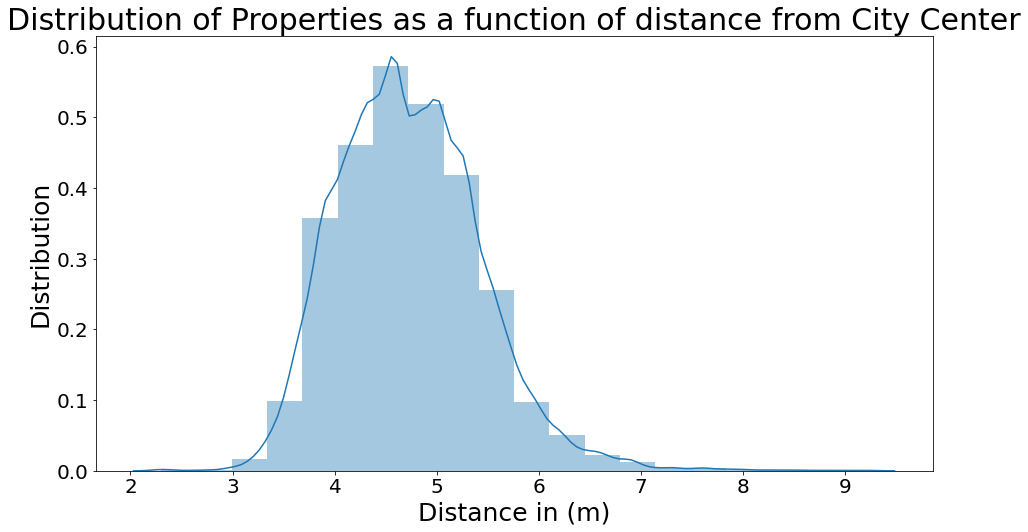

In [6]:
figure =plt.figure(figsize=(15,8))
sns.distplot(D1['price new'],bins=20)
plt.title('Distribution of Properties as a function of distance from City Center', fontsize=30)
plt.xlabel('Distance in (m)',fontsize=25)
plt.ylabel('Distribution',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [38]:
D2=D1[(D1['price new'] >=3 )&(D1['price new'] <= 6.5)]
#D2=D1

In [39]:
X=D2.drop(['price new','name','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365'],axis=1)
Y=D2['price new']
X.head()

,Unnamed: 0,id,host_id,latitude,longitude,Distance in m,Roomtype_Entire home/apt,Roomtype_Private room,Roomtype_Shared room,NBG_Bronx,NBG_Brooklyn,NBG_Manhattan,NBG_Queens,NBG_Staten Island
0,0,5728806,4271676,40.72217,-73.99481,3531.592026,0,1,0,0,0,1,0,0
2,2,35515415,267193767,40.75558,-73.89316,3625.877178,1,0,0,0,0,0,1,0
3,3,36202006,43392243,40.60110,-74.07830,11083.756514,0,0,1,0,0,0,0,1
4,4,3780951,16065171,40.81022,-73.94266,1928.404038,0,0,1,0,0,1,0,0
5,5,9944426,51105827,40.71192,-74.01572,4380.596617,1,0,0,0,0,1,0,0


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=10000)
sklr = LinearRegression()
sklr.fit(X_train,y_train)
sklr.score(X_test,y_test)

0.5161328158684941